In [1]:
# Project 1 (Stroke Prediction Dataset)
# COMP541 02/22/2023
# Lucas Troutman

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Import data visualization packages
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
# load the file
stroke_df=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
# First look at dataset
print("Head(5):\n", stroke_df.head(5))
print("\nShape:\n", stroke_df.shape)
print("\nDescribe:\n", stroke_df.describe().T)

Head(5):
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Shape:
 (5110, 12)

Describe:
               

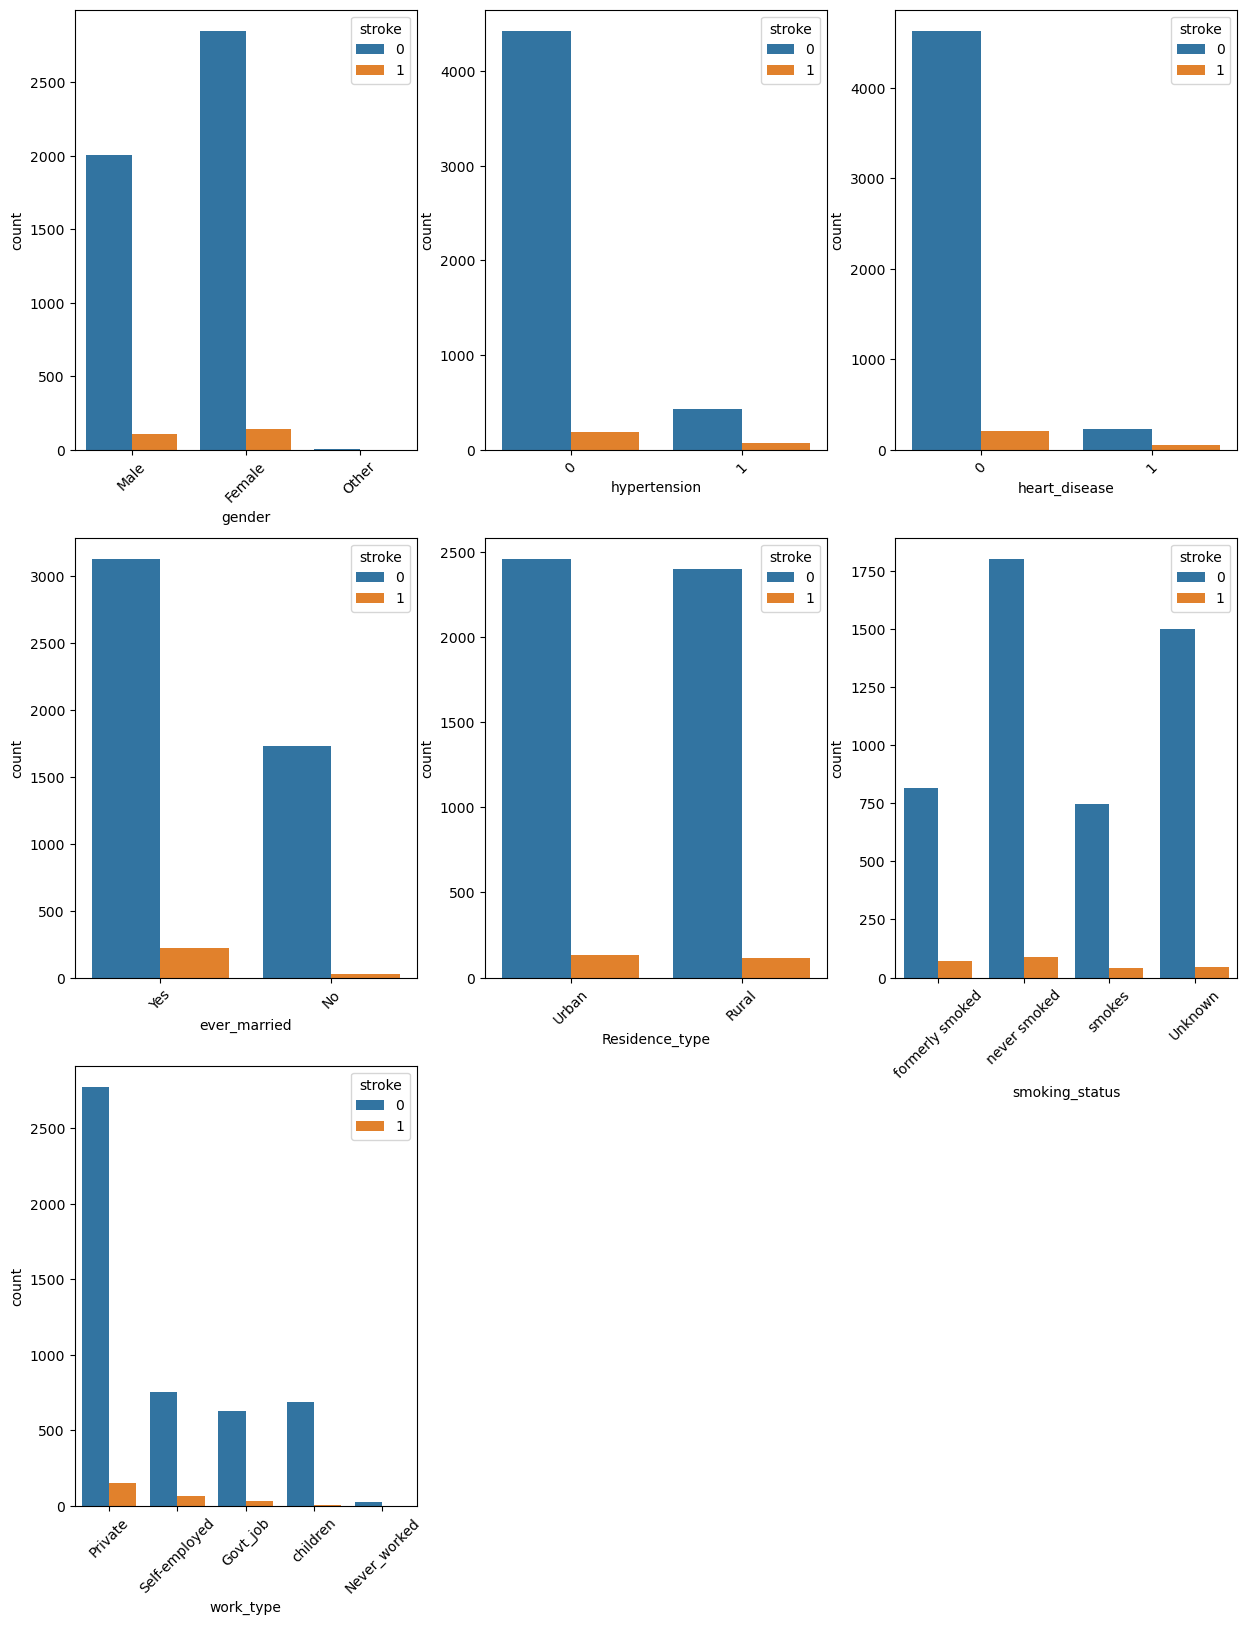

In [4]:
# Create bar plots for different attributes (Stroke frequency on different parameters)

# total list , features = ['gender', 'age', 
#'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
stroke_df.columns

#age, bmi, avg_glucose_level not added, does not display well as bar graph and won't finish running
attributes = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']

# gives each feature attribute a number
list(enumerate(attributes))

#Figure sizes
plt.figure(figsize = (15,40))

# Loop for each attribute
for i in enumerate(attributes):
    plt.subplot(6, 3, i[0]+1)
    sns.countplot(x = i[1],data = stroke_df, hue = 'stroke')
    plt.xticks(rotation = 45)

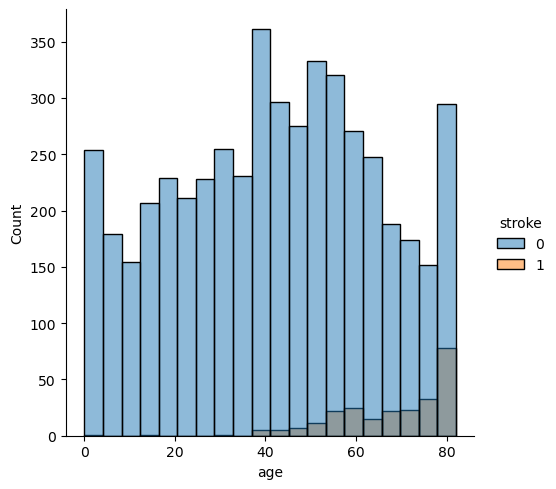

In [5]:
# Create histogram with density curve of ages and whether they had a stroke or not.
sns.displot(data = stroke_df, x = 'age', hue = "stroke", kde=False)

# This distribution plot shows the count of people organized by age and categorized by whether
# or not the person experienced a stroke (0 (False), 1 (True)) .
# There is a higher count of people 40 or older who have suffered a stroke compared to other ages.
# The distribution for those that have had a stroke is more apparent in the older ages, 
# which could mean that being an older age has a stronger impact on having a stroke.

<AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>

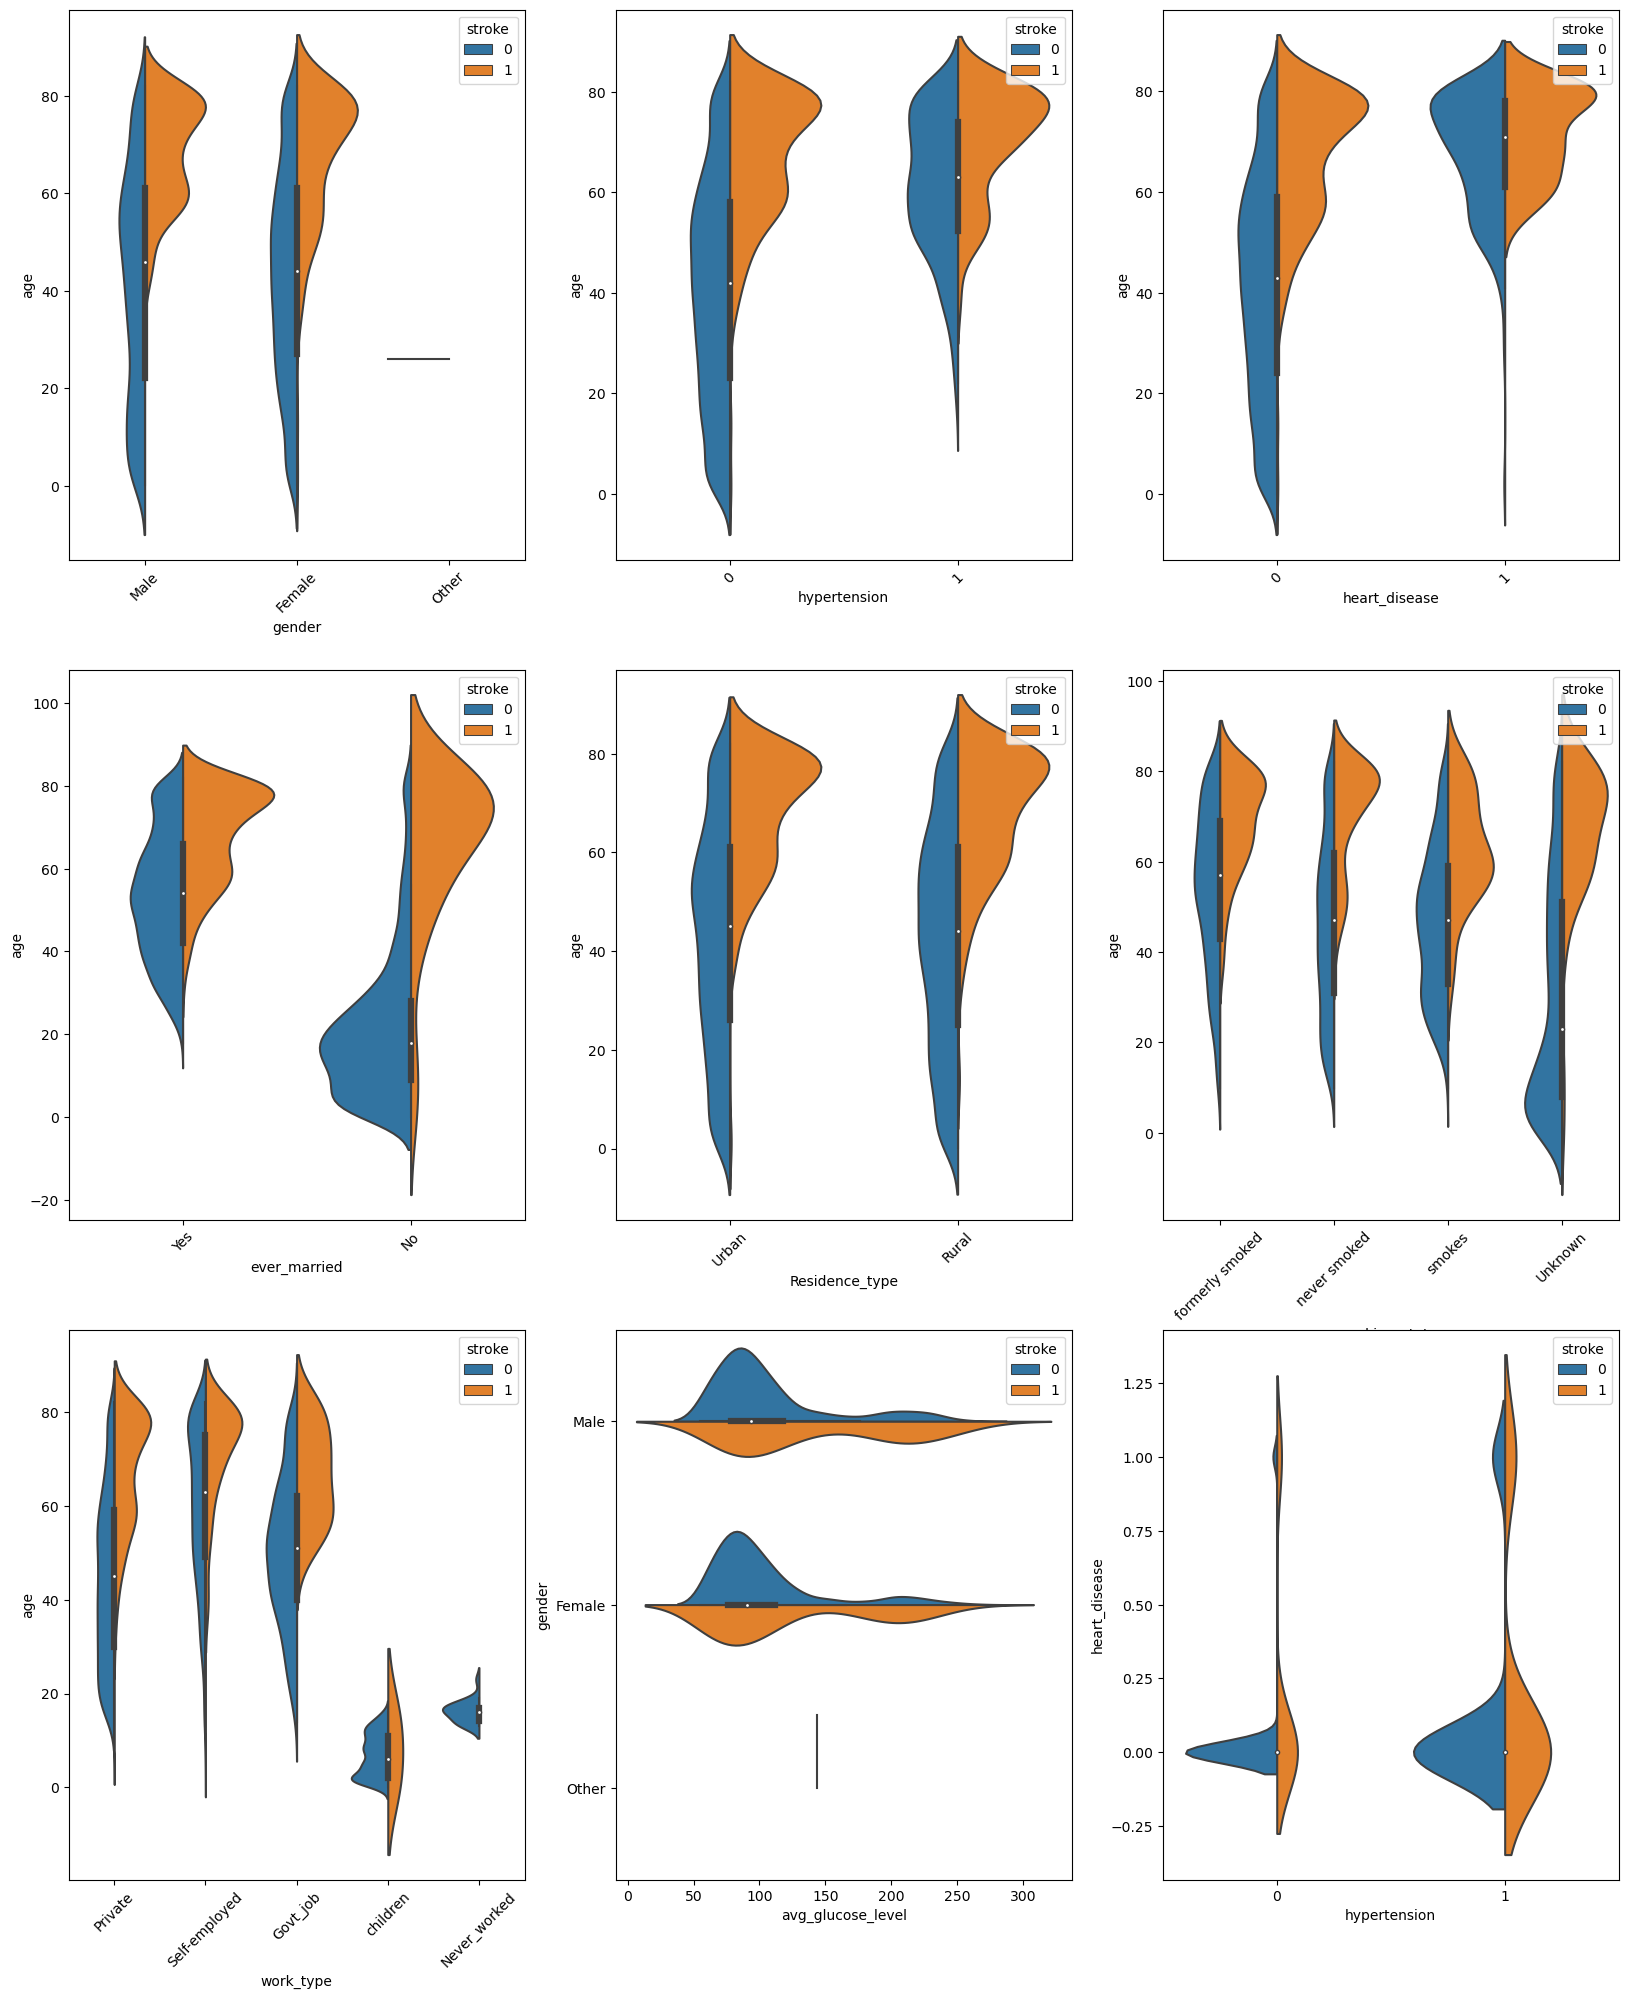

In [6]:
# Create violin plots
#Is this dataset imbalanced?

#bmi, avg_glucose_level not added, does not display well as bar graph and won't finish running
attributes = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']

# loop
plt.figure(figsize = (20,50))
for i in enumerate(attributes):
    plt.subplot(6, 3, i[0]+1)
    sns.violinplot(data = stroke_df, x = i[1], y='age', hue ='stroke', split = True)
    plt.xticks(rotation = 45)

plt.subplot(6, 3, 8)
sns.violinplot(data = stroke_df,x ='avg_glucose_level', y='gender', hue ='stroke', split = True)

plt.subplot(6, 3, 9)
sns.violinplot(data = stroke_df,x ='hypertension', y='heart_disease', hue ='stroke', split = True)

# After exploring different attributes provided by the dataset and comparing them with other attributes, it appears to me that at times
# the distribution within different attributes is skewed or unbalanced. I would consider certain violin plots to be imbalanced with
# the distribution of, for example, the number of those with heart disease with value of 0.50 for both groups that have hypertension and don't.
# A more obvious example would be the number of those who have experienced a stroke being the large minority compared to those who haven't.
# From my observations, with the inclusion of the bar plots and histogram, the dataset is skewed or imbalanced.

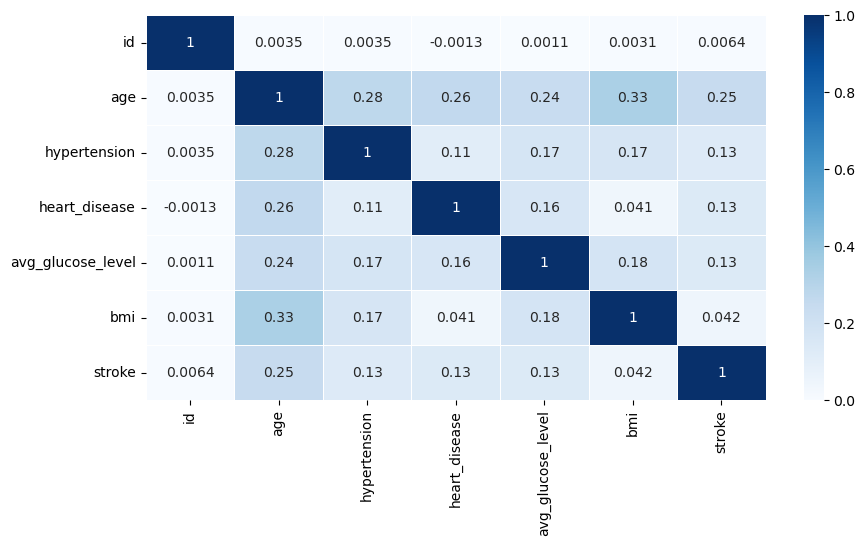

In [7]:
# Generate a heat map
# Which variables have the strongest correlation?

plt.figure(figsize=(10,5))
sns.heatmap(stroke_df.corr(), annot=True, linewidth=0.5, cmap = 'Blues');

# With the help of the heatmap, it is made more clear where there are correlations among variables.
# Those closer to 1, or are the darkest shade of blue, show a strong correlation between variables.
# So for example, some of the highest values on this heatmap (besides the attributes referring to themselves),
# are: 'age' and 'bmi' with 0.33,'hypertension' and 'age' with 0.28, and 'heart_disease' and 'age' with 0.26.
# These values tell us that the correlation between each pair of attributes, could help us make some predictions.

In [8]:
# By removing the outliers of each column (bmi & avg_glucose_level), the lows of 0.10 and the highs of 0.90,
# the standard deviationof the columns indicate a much tighter spread.
# Less extreme min and max values shown in the filtered columns, compared to the unfiltered columns,
# shows the presence of these outliers and its effects on the dataset.

#---------------------------------------------------------------------------------------------#
print("Unfiltered BMI column")
print(stroke_df['bmi'].describe().T)
print("\n")

q1_low = stroke_df["bmi"].quantile(0.10)
q1_hi  = stroke_df["bmi"].quantile(0.90)

print("Filtered BMI column")
df_filtered = stroke_df[(stroke_df["bmi"] < q1_hi) & (stroke_df["bmi"] > q1_low)]
print(df_filtered['bmi'].describe().T)
print("\n")

#---------------------------------------------------------------------------------------------#

print("Unfiltered avg_glucose_level column")
print(stroke_df['avg_glucose_level'].describe().T)
print("\n")

q2_low = stroke_df["avg_glucose_level"].quantile(0.10)
q2_hi  = stroke_df["avg_glucose_level"].quantile(0.90)

print("Filtered avg_glucose_level column")
df_filtered = stroke_df[(stroke_df["avg_glucose_level"] < q2_hi) & (stroke_df["avg_glucose_level"] > q2_low)]
print(df_filtered['avg_glucose_level'].describe().T)

Unfiltered BMI column
count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


Filtered BMI column
count    3917.000000
mean       28.329972
std         4.778856
min        19.800000
25%        24.500000
50%        28.000000
75%        31.900000
max        38.800000
Name: bmi, dtype: float64


Unfiltered avg_glucose_level column
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


Filtered avg_glucose_level column
count    4088.000000
mean       97.846204
std        25.226456
min        65.790000
25%        80.040000
50%        91.885000
75%       108.515000
max       192.160000
Name: avg_glucose_level, dtype: float64


In [9]:
# Fill null values of 'bmi' using interpolation

# any null values in dataset? Only BMI.
print("Looking for NULL values:\n\n", stroke_df.isna().any())
print("\n")

# Linear interpolations estimates a missing value by connecting dots in increasing order.
# It imputes missing values in the same increasing order from previous values
df_imputed = df_filtered.interpolate(method = 'linear', limit_direction = 'forward')

# Are there any null values in the column? No null values, all false.
print("Any NULL values in bmi after imputing?\n\n", df_imputed.isna().any())
print("\n")

Looking for NULL values:

 id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool


Any NULL values in bmi after imputing?

 id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool




In [10]:
# Converting attributes with datatype 'object' using LabelEncoder
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
block = pd.DataFrame(df_imputed)

# Attributes to transform: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'.
df_imputed.dtypes
attributes = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Loop for all attributes to transform
for i in enumerate(attributes):
    # Apply the functionality of the label encoder pointed by the object to the data variable.
    block[i[1]] = label.fit_transform(block[i[1]])
    
    # Transform the datatype of the variable to 'category' datatype
    block[i[1]] = block[i[1]].astype('category')
    
    # Convert the labels to integer types
    block[i[1]] = block[i[1]].cat.codes


# Resulting DataFrame with outliers removed, null values imputed, and label encoded.
print("Converted DataTypes:\n",df_imputed.dtypes)
print("\n")

print("Encoded to Integer Values for Relevant Attributes:\n\n", block)

Converted DataTypes:
 id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object


Encoded to Integer Values for Relevant Attributes:

          id  gender   age  hypertension  heart_disease  ever_married  \
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
5     56669       1  81.0             0              0             1   
6     53882       1  74.0             1              1             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0   